In [2]:
#importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os
os.listdir()

['.ipynb_checkpoints',
 'best_mode_lr.sav',
 'details of running the project.txt',
 'healthcare-dataset-stroke-data.csv',
 'stroke_prediction_code.ipynb']

In [4]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv') #Storing the data

In [5]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


#explorating data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
# Missing values

In [8]:
data.isnull().sum() #Checking for null values

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
data.shape

(5110, 12)

In [10]:
data['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [11]:
data['bmi']

0       36.6
1        NaN
2       32.5
3       34.4
4       24.0
        ... 
5105     NaN
5106    40.0
5107    30.6
5108    25.6
5109    26.2
Name: bmi, Length: 5110, dtype: float64

In [12]:
data.isnull().sum().sum()

201

In [13]:
data['bmi'].fillna(data['bmi'].mean(), inplace = True) #Filling null values with the mean

In [14]:
data.isnull().sum().sum()

0

In [15]:
# feature selection

In [16]:
data.drop(columns='id', axis = 1,inplace = True)

In [17]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [18]:
data.isnull().sum().sum()

0

In [19]:
# Outlier removal not required.

# Label encoding

In [20]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [21]:
data['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [22]:
from sklearn.preprocessing import LabelEncoder
l_enc = LabelEncoder()

In [23]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [24]:
gender = l_enc.fit_transform(data['gender'])

In [25]:
gender

array([1, 0, 1, ..., 0, 1, 0])

In [26]:
marritial_status = l_enc.fit_transform(data['ever_married'])

In [27]:
work_type = l_enc.fit_transform(data['work_type'])

In [28]:
Residence_type = l_enc.fit_transform(data['Residence_type'])

In [29]:
smoking_status = l_enc.fit_transform(data['smoking_status'])

In [30]:
# list(smoking_status)

In [31]:
data['gender'] = gender
data['ever_married'] = marritial_status
data['work_type'] = work_type
data['Residence_type'] = Residence_type
data['smoking_status'] = smoking_status


In [32]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int32  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int32  
 5   work_type          5110 non-null   int32  
 6   Residence_type     5110 non-null   int32  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int32  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int32(5), int64(3)
memory usage: 339.5 KB


In [124]:
# Everything is converted into an int from string

In [125]:
# successfully encoded all the data


# Visualization

In [36]:
# Gender vs stroke

<AxesSubplot:xlabel='gender', ylabel='count'>

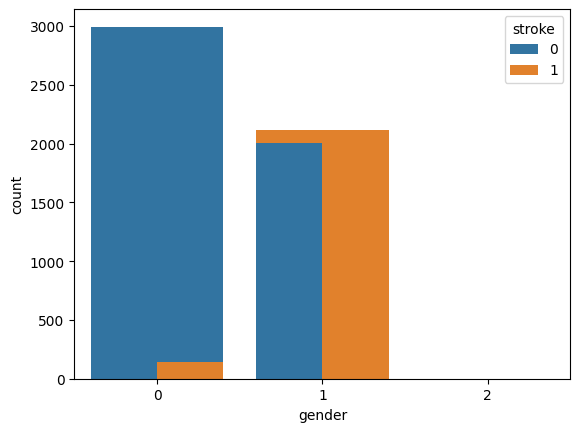

In [37]:
sns.countplot(data = data, x = 'gender')
sns.countplot(data = data, x = 'gender', hue = 'stroke')

In [38]:
# age vs stroke, age is not just a number, it is a crucial factor in predicting the stroke

age and stroke


<AxesSubplot:xlabel='stroke', ylabel='age'>

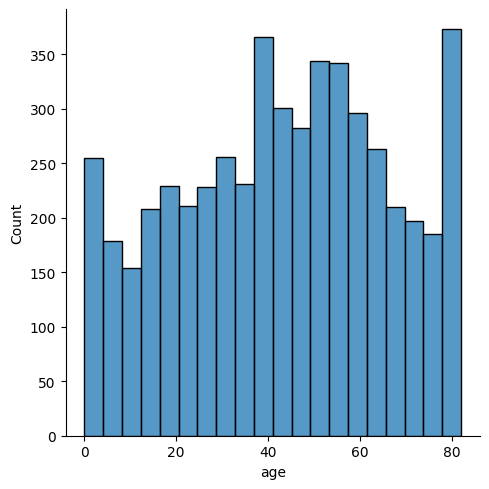

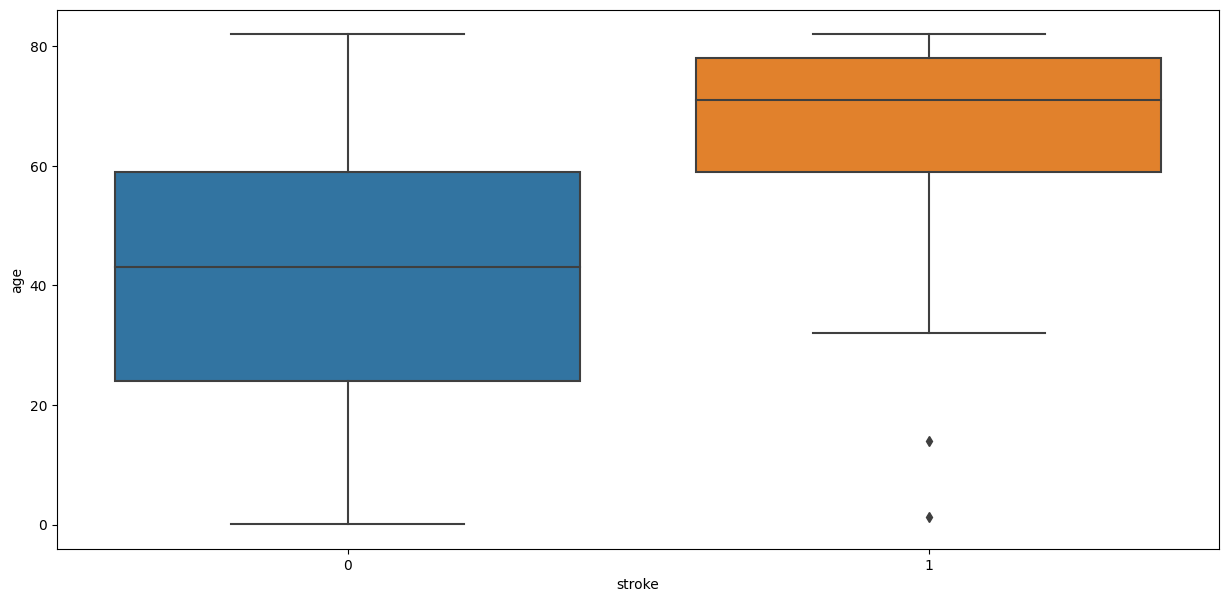

In [39]:
sns.displot(data['age'])
plt.figure(figsize=(15,7))
print('age and stroke')
sns.boxplot(data = data, x = 'stroke', y = 'age')

#Hypertension vs stroke


#Hypertension is a condition when a person has high blood pressure. Hypertension might result in a stroke. Let’s see how it goes.

<AxesSubplot:xlabel='hypertension', ylabel='count'>

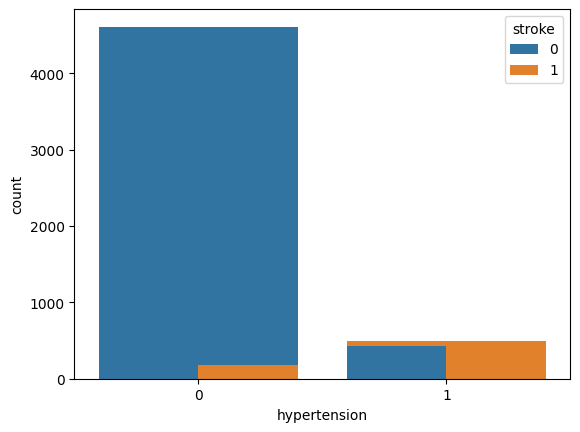

In [127]:
sns.countplot(data = data, x = 'hypertension')
sns.countplot(data = data, x = 'hypertension', hue = 'stroke')

#Heart disease vs stroke

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

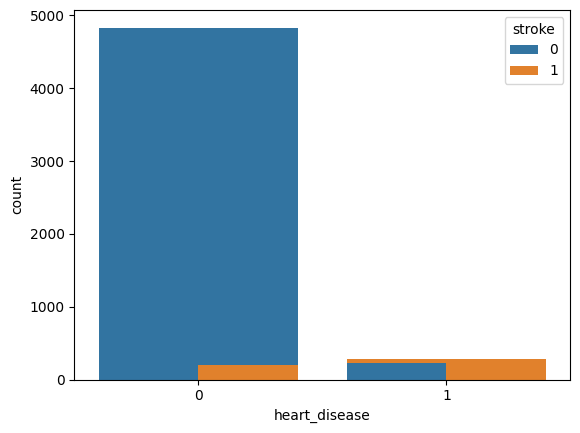

In [41]:
sns.countplot(data = data, x = 'heart_disease')
sns.countplot(data = data, x = 'heart_disease', hue = 'stroke')

In [42]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

<AxesSubplot:xlabel='work_type', ylabel='count'>

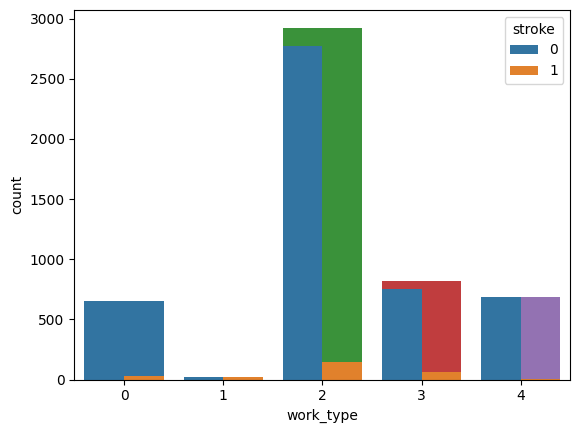

In [43]:
sns.countplot(data = data, x = 'work_type')

sns.countplot(data = data, x = 'work_type', hue = 'stroke')

In [44]:
# Average glucose level

age and stroke


<AxesSubplot:xlabel='stroke', ylabel='avg_glucose_level'>

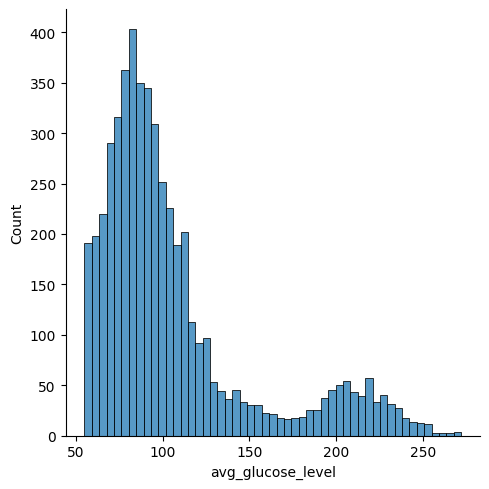

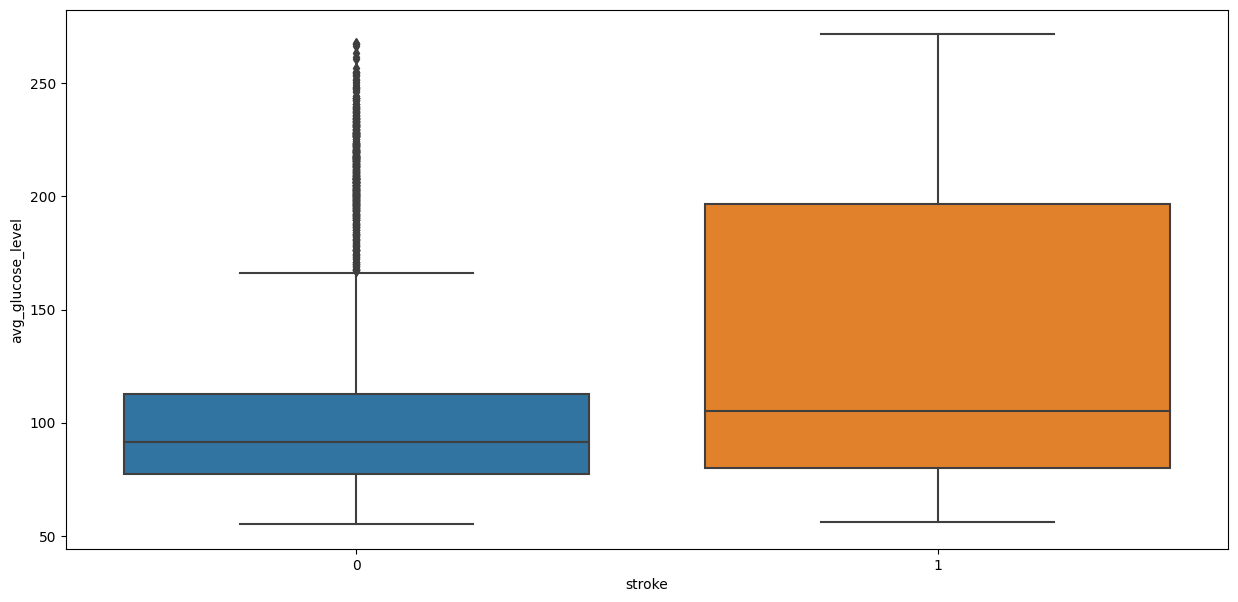

In [45]:
sns.displot(data['avg_glucose_level'])
plt.figure(figsize=(15,7))
print('age and stroke')
sns.boxplot(data = data, x = 'stroke', y = 'avg_glucose_level')

<AxesSubplot:xlabel='stroke', ylabel='bmi'>

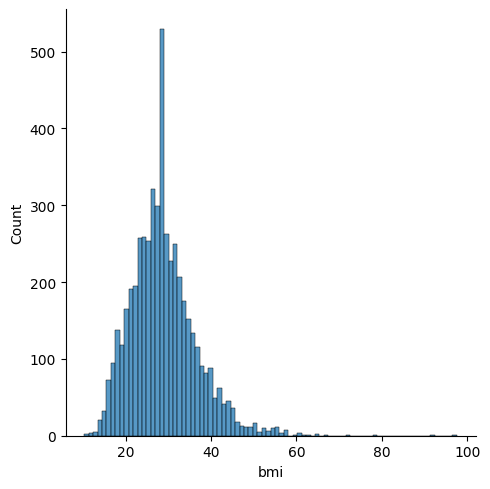

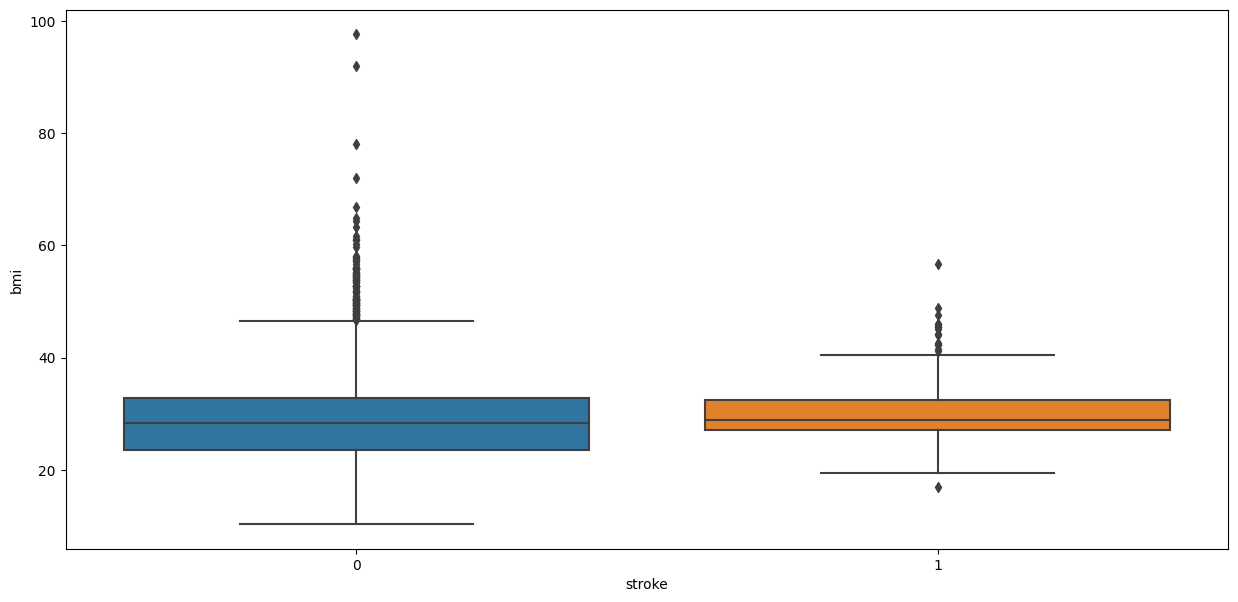

In [46]:
sns.displot(data['bmi'])
plt.figure(figsize=(15,7))  
sns.boxplot(data = data, x = 'stroke', y = 'bmi')

In [47]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [48]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [49]:
# Now lets do partitioning i.e; split the dat into training and testing

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X = data.drop('stroke', axis = 1)

In [52]:
Y = data['stroke']

In [53]:
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2
...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1


In [54]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)

In [56]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
2804,0,69.00,0,0,1,0,0,70.98,30.0,0
1054,0,76.00,0,0,0,3,1,77.52,40.9,1
3549,0,80.00,1,0,1,2,1,125.89,28.9,3
1678,0,79.00,0,0,1,3,1,80.57,23.8,2
2209,1,78.00,1,0,1,3,0,75.19,27.6,2
...,...,...,...,...,...,...,...,...,...,...
789,0,54.00,0,0,1,2,0,111.41,31.1,2
968,0,55.00,0,0,1,2,0,112.47,32.8,3
1667,0,40.00,0,0,1,2,0,191.48,27.9,3
3321,1,1.88,0,0,0,4,1,81.42,13.5,0


In [57]:
data.shape

(5110, 11)

In [58]:
X_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
2778,0,29.0,0,0,1,2,1,116.98,23.400000,2
4029,1,58.0,0,0,1,0,1,101.96,34.500000,2
261,0,37.0,0,0,1,2,0,162.96,39.400000,2
1868,0,49.0,0,0,1,0,1,90.58,23.200000,0
1028,0,57.0,0,0,1,2,1,78.46,32.600000,2
...,...,...,...,...,...,...,...,...,...,...
1176,0,29.0,0,0,0,0,0,57.02,43.000000,1
668,0,48.0,1,0,0,2,0,118.14,28.893237,1
3181,1,54.0,0,1,1,0,1,90.30,30.800000,3
2742,0,36.0,0,0,1,2,0,90.22,28.700000,1


In [59]:
Y_train

2804    0
1054    0
3549    0
1678    0
2209    0
       ..
789     0
968     0
1667    0
3321    0
1688    0
Name: stroke, Length: 4088, dtype: int64

In [60]:
Y_test

2778    0
4029    0
261     0
1868    0
1028    0
       ..
1176    0
668     0
3181    0
2742    0
4069    0
Name: stroke, Length: 1022, dtype: int64

# Normalize

In [61]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [62]:
X_train_std = std.fit_transform(X_train) #fit_transform = undrstand the data and then transform

In [63]:
X_test_std = std.transform(X_test) #transform = just transform the data

In [64]:
# We use fit.transform in X_train and just transform in X_test to prevent the data leak.

In [65]:
X_train_std

array([[-0.83316164,  1.14435022, -0.32474977, ..., -0.77378549,
         0.14703257, -1.27303178],
       [-0.83316164,  1.45290527, -0.32474977, ..., -0.62937553,
         1.56093771, -0.34570571],
       [-0.83316164,  1.62922245,  3.07929396, ...,  0.43868409,
         0.0043449 ,  1.50894643],
       ...,
       [-0.83316164, -0.1339493 , -0.32474977, ...,  1.88697911,
        -0.12537117,  1.50894643],
       [ 1.19782512, -1.81425197, -0.32474977, ..., -0.5432595 ,
        -1.99328254, -1.27303178],
       [-0.83316164, -0.48658365, -0.32474977, ..., -0.55694974,
         2.06683037,  0.58162036]])

In [66]:
X_train_std

array([[-0.83316164,  1.14435022, -0.32474977, ..., -0.77378549,
         0.14703257, -1.27303178],
       [-0.83316164,  1.45290527, -0.32474977, ..., -0.62937553,
         1.56093771, -0.34570571],
       [-0.83316164,  1.62922245,  3.07929396, ...,  0.43868409,
         0.0043449 ,  1.50894643],
       ...,
       [-0.83316164, -0.1339493 , -0.32474977, ...,  1.88697911,
        -0.12537117,  1.50894643],
       [ 1.19782512, -1.81425197, -0.32474977, ..., -0.5432595 ,
        -1.99328254, -1.27303178],
       [-0.83316164, -0.48658365, -0.32474977, ..., -0.55694974,
         2.06683037,  0.58162036]])

In [67]:
# No need to normalize Y because everything in Y is already  0 and 1

In [68]:
#  Now everything is closer to 0 and 1

<AxesSubplot:>

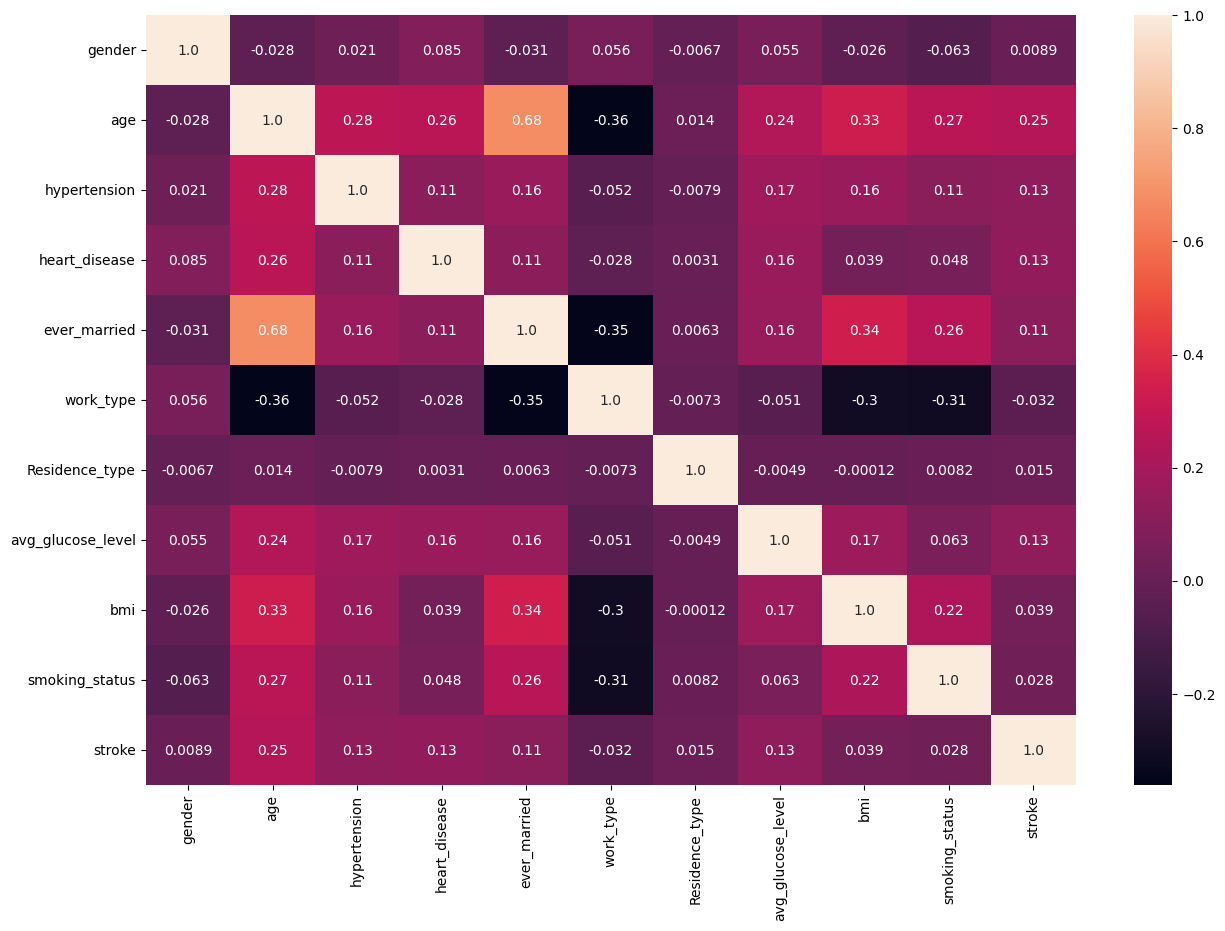

In [69]:
plt.figure(figsize=(15,10))                 # plotting the heat map to see the dependency of one feature over other 
sns.heatmap(data.corr(),annot=True,fmt='.2')


# Model Training

# 1) Desision Tree

In [70]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
dtc = DecisionTreeClassifier()

In [72]:
dtc.fit(X_train_std, Y_train)

DecisionTreeClassifier()

In [73]:
dtc.feature_importances_

array([0.0270082 , 0.20276594, 0.02256322, 0.01833838, 0.01570507,
       0.03041699, 0.03308711, 0.31070376, 0.2677943 , 0.07161702])

In [74]:
X_train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [75]:
prediction_by_decision_tree = dtc.predict(X_test_std)

In [76]:
prediction_by_decision_tree

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [77]:
Y_test

2778    0
4029    0
261     0
1868    0
1028    0
       ..
1176    0
668     0
3181    0
2742    0
4069    0
Name: stroke, Length: 1022, dtype: int64

In [78]:
Y_test.value_counts()

0    977
1     45
Name: stroke, dtype: int64

In [79]:
from sklearn.metrics import accuracy_score

In [80]:
ac_dt = accuracy_score(Y_test, prediction_by_decision_tree)*100

In [81]:
ac_dt

91.29158512720157

In [82]:
from sklearn.metrics import classification_report

In [83]:
print(classification_report(Y_test, prediction_by_decision_tree))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       977
           1       0.11      0.13      0.12        45

    accuracy                           0.91      1022
   macro avg       0.53      0.54      0.54      1022
weighted avg       0.92      0.91      0.92      1022



# Logistic Regression

In [84]:
from sklearn.linear_model import LogisticRegression
lR = LogisticRegression()

In [85]:
lR.fit(X_train_std, Y_train)

LogisticRegression()

In [86]:
prediction_by_logistic_regressor = lR.predict(X_test_std)

In [87]:
prediction_by_logistic_regressor

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [88]:
ac_lr = accuracy_score(Y_test, prediction_by_logistic_regressor)*100

In [89]:
ac_lr

95.59686888454011

In [90]:
print(classification_report(Y_test, prediction_by_logistic_regressor))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       977
           1       0.00      0.00      0.00        45

    accuracy                           0.96      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.91      0.96      0.93      1022



C:\Users\Shamanth\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shamanth\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shamanth\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

# K Nearest Neibhours

In [91]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [92]:
knn.fit(X_train_std, Y_train)

KNeighborsClassifier()

In [93]:
prediction_by_knn = knn.predict(X_test_std)

In [94]:
prediction_by_knn

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [95]:
ac_knn = accuracy_score(Y_test, prediction_by_knn)*100

In [96]:
ac_knn

95.59686888454011

In [97]:
print(classification_report(Y_test, prediction_by_knn))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       977
           1       0.00      0.00      0.00        45

    accuracy                           0.96      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.91      0.96      0.93      1022



C:\Users\Shamanth\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shamanth\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shamanth\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

# Random Forest

In [98]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [99]:
rf.fit(X_train_std, Y_train) #we can use either X_train or X_train_std in decision trees or random forest algorithms

RandomForestClassifier()

In [100]:
prediction_by_random_forest = rf.predict(X_test_std)

In [101]:
prediction_by_random_forest

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [102]:
ac_rf = accuracy_score(Y_test, prediction_by_decision_tree)*100

In [103]:
ac_rf

91.29158512720157

In [104]:
print(classification_report(Y_test, prediction_by_random_forest))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       977
           1       0.00      0.00      0.00        45

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.91      0.95      0.93      1022



In [105]:
# .........

In [106]:
# .........

In [107]:
# .........

In [108]:
# .........

# Support Vector Machine

In [109]:
from sklearn.svm import SVC
sv = SVC()

In [110]:
sv.fit(X_train_std, Y_train)

SVC()

In [111]:
prediction_by_support_vector_machine = sv.predict(X_test_std)

In [112]:
prediction_by_support_vector_machine

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [113]:
ac_svm = accuracy_score(Y_test, prediction_by_support_vector_machine)*100

In [114]:
ac_svm

95.59686888454011

In [115]:
ac_lr

95.59686888454011

In [116]:
# Both SVM and LR are giving the exact same accuracy score

In [117]:
# .........

In [118]:
# .........

In [119]:
# .........

In [120]:
# .........

# Now lets plot all the acuuracy scores in the form of a graph

Text(0, 0.5, 'Accuracy in %')

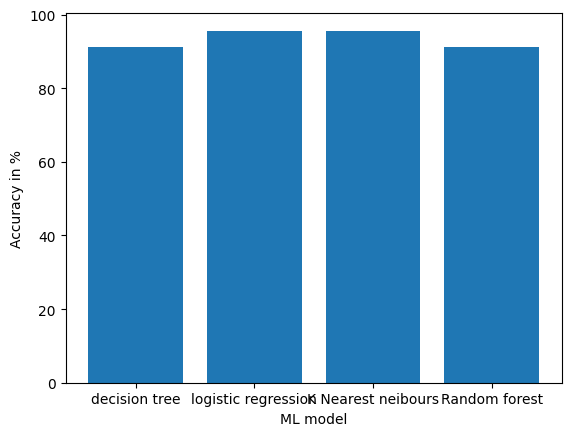

In [121]:
plt.bar(['decision tree', 'logistic regression', 'K Nearest neibours', 'Random forest'], [ac_dt, ac_lr, ac_knn, ac_rf])
plt.xlabel('ML model')
plt.ylabel('Accuracy in %')

In [122]:
# So,  We have Highest accuracy score for logistic regression